C:\Users\SANDRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


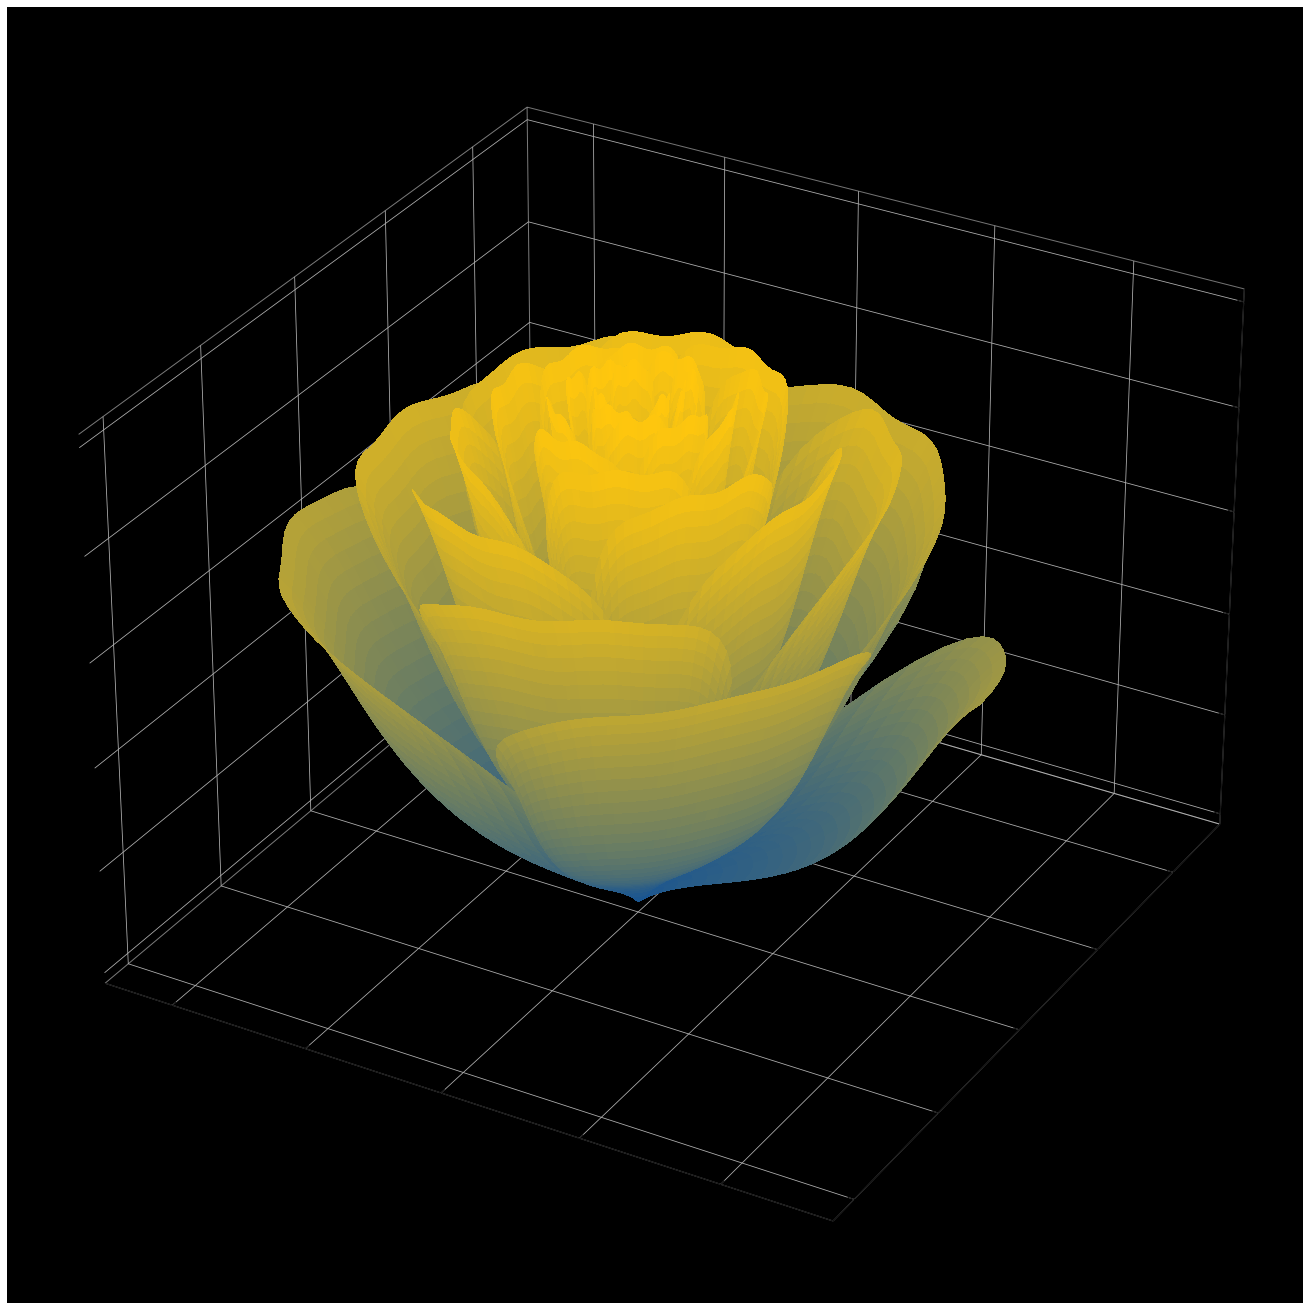

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import animation
from IPython.display import HTML

# Generar puntos en el espacio x y t
x = np.linspace(0, 1, num=30)
t = np.linspace(0, 1, num=1200) * 20 * np.pi + 4 * np.pi
x, t = np.meshgrid(x, t)

# Calcular el perfil de deformación p
p = 0.5 * np.pi * np.exp(-t / (8 * np.pi))

# Cambio temporal en la deformación
change = np.sin(15 * t) / 150

# Calcular la velocidad u en función del tiempo
u = 1 - (1 - np.mod(3.3 * t, 2 * np.pi) / np.pi)**4 / 2 + change

# Calcular las coordenadas y en función de x y p
y = 2 * (x**2 - x)**2 * np.sin(p)

# Calcular las coordenadas radiales r y altura h en función de x, y, y u
r = u * (x * np.sin(p) + y * np.cos(p)) * 1.5
h = u * (x * np.cos(p) - y * np.sin(p))

# Definir los colores en RGB
yellow = [255, 199, 13]
blue = [26, 85, 144]

# Generar una transición suave entre los colores
num_steps = 200
colors = [np.linspace(blue[i], yellow[i], num_steps) for i in range(3)]
colors = np.transpose(colors) / 255.0

# Crear el mapa de colores personalizado
newcmp = ListedColormap(colors)

# Crear figura 3D
fig = plt.figure(figsize=(18, 18))
ax = Axes3D(fig)
ax.set_facecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Graficar la superficie de la flor
surf = ax.plot_surface(r * np.cos(t), r * np.sin(t), h, rstride=1, cstride=1, cmap=newcmp, antialiased=False)

In [10]:
# Definir la función de animación
def animate(i):
    # Calcular el ángulo de elevación
    if i <= 180:
        # Elevación cuando gira de 0° a 180°
        elev = 10 + 0.15*i
    else:
        # Elevación cuando gira de 180° a 360° 
        elev = 37 - 0.15*(i - 180)
    
    # Actualizar la vista de la gráfica
    ax.view_init(elev=elev, azim=i)
    return fig,

# Crear la animación
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=360,
                               interval=20,
                               blit=True)

# Guardar la animación
anim.save('3D_yellow.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
HTML(anim.to_html5_video())